# Image quality control

In [1]:
#import libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

# 1.0 Bilateral filtering (noise remover)

In [2]:
# single imgage
import cv2 
  
# Read the image. 
img = cv2.imread('IMG_4159.JPG') 
  
# Apply bilateral filter with d = 15,  
# sigmaColor = sigmaSpace = 75. 
bilateral = cv2.bilateralFilter(img, 9, 75, 75) 
  
# Save the output. 
cv2.imwrite('filtered2.jpg', bilateral) 

True

# 1.1 Alternative function to apply bilateral filter in multiple images at a time

In [2]:
import os
import cv2

# Function to apply bilateral filter to an image
def apply_bilateral_filter(input_image, output_dir):
    # Read the input image
    image = cv2.imread(input_image)

    # Apply bilateral filter with a diameter of 9 and sigma values of 75 and 75
    filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

    # Extract the filename from the input image path
    filename = os.path.basename(input_image)

    # Construct the output path for the filtered image
    output_path = os.path.join(output_dir, filename)

    # Save the filtered image
    cv2.imwrite(output_path, filtered_image)

# Input directory containing images
input_dir = 'imgs/'

# Output directory for filtered images
output_dir = '1_bilateral_output_images/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get a list of all image files in the input directory
image_files = [f for f in os.listdir(input_dir) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.JPG')]

# Apply bilateral filter to each image in the input directory
for image_file in image_files:
    input_image_path = os.path.join(input_dir, image_file)
    apply_bilateral_filter(input_image_path, output_dir)

print("Bilateral filtering completed. Filtered images saved in the output directory.")

Bilateral filtering completed. Filtered images saved in the output directory.


# 2.0 Histogram equalization (apply Contrast Enhancement in an image)

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
path = "IMG_4159.JPG"
img = cv2.imread(path)

#### view the histogram of the input image

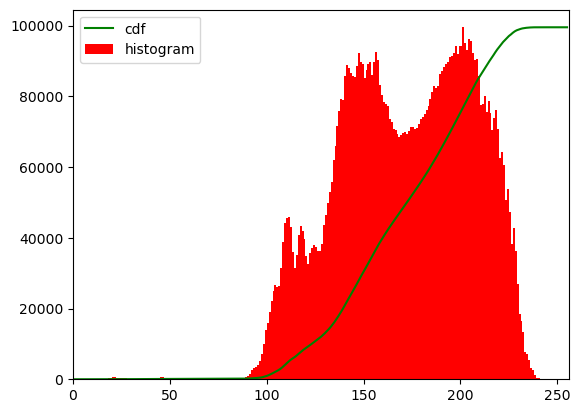

In [5]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'g')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [4]:
#equ = cv.equalizeHist(img)

In [8]:
import cv2
import numpy as np

img = cv2.imread('IMG_4159.JPG')


#clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
#img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])


## covert to 8 bits fromRGB format
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

#cv2.imshow('Color input image', img)
#cv2.imshow('Histogram equalized', img_output)

#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.waitKey(1)

In [23]:
# Save the output. 
cv2.imwrite('input1.jpg', img)
cv2.imwrite('output1.jpg', img_output)

True

##  3.0 Adjust the gamma correction to fine-tune contrast based on the characteristics of the images.

In [15]:
import cv2
import numpy as np
import math

# read image
img = cv2.imread('IMG_4159.JPG')

# METHOD 1: RGB

# convert img to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute gamma = log(mid*255)/log(mean)
mid = 0.5
mean = np.mean(gray)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)

# do gamma correction
img_gamma1 = np.power(img, gamma).clip(0,255).astype(np.uint8)



# METHOD 2: HSV (or other color spaces)

# convert img to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, sat, val = cv2.split(hsv)

# compute gamma = log(mid*255)/log(mean)
mid = 0.8
mean = np.mean(val)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)

# do gamma correction on value channel
val_gamma = np.power(val, gamma).clip(0,255).astype(np.uint8)

# combine new value channel with original hue and sat channels
hsv_gamma = cv2.merge([hue, sat, val_gamma])
img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2BGR)

# show results
#cv2.imshow('input', img)
#cv2.imshow('result1', img_gamma1)
#cv2.imshow('result2', img_gamma2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# save results
cv2.imwrite('gamma1.jpg', img_gamma1)
cv2.imwrite('gamma2.jpg', img_gamma2)

0.9431519960960077
1.0168765705306428


True

## 3.1 Adjust the gamma correction to multiple images.

Adjust the gamma value to your desired correction level. Values greater than 1 will brighten the image, while values less than 1 will darken it.

In [3]:
import cv2
import os
import numpy as np

def gamma_correction_multiple_images_and_save(input_dir, output_dir, gamma=2.5):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for img_name in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_name)
        
        # Read the image
        image = cv2.imread(img_path)
        
        if image is None:
            print(f"Error: Unable to read image at {img_path}")
            continue
        
        # Apply gamma correction
        
        gamma_corrected_image = np.power(image / 255.0, gamma) * 255.0
        gamma_corrected_image = np.clip(gamma_corrected_image, 0, 255).astype(np.uint8)
        
        # Save the gamma-corrected image
        output_path = os.path.join(output_dir, img_name)
        cv2.imwrite(output_path, gamma_corrected_image)
        
        print(f"Gamma-corrected image saved at: {output_path}")

# Example usage
input_directory = "1_bilateral_output_images/"
output_directory = "3_gamma_output_images/"
gamma_value = 1.5  # Adjust the gamma value as needed
gamma_correction_multiple_images_and_save(input_directory, output_directory, gamma=gamma_value)


Gamma-corrected image saved at: 3_gamma_output_images/20170622_163404.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_143133.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_000630.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_123102.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170816_094403.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_153534.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_020754.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_113036.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_202541.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170607_142842.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_172031.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_153638.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170724_144553.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170817_143640.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170613_161204.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_155602.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_203106.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170728_175037.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170818_142413.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_215608.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_150507.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_140153.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170812_163628.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_202430.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170613_171032.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_003844.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170831_214542.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_100311.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170725_143024.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_144255.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170807_164644.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_111741.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_151415.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_133520.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170819_160141.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_112557.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_091339.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_132938.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170607_151553.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20171023_150905.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_104922.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170725_134910.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170613_175637.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_203711.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_012919.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_154814.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_105253.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_104641.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170708_161947.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_142512.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_234847.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_031822.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170710_162728.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_163228.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_014025.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_214737.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_180653.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170710_160706.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_142816.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170613_173247.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_160328.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170708_104330.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_142852.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170725_211833.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_153039.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170724_114414.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_133350.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170818_175753.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170714_160619.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170819_120236.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_155920.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_202932.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_142850.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170724_141719.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170816_092558.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_160625.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_145110.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_151333.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170818_170756.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170807_161248.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_145239.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_215020.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_140251.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170725_151538.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_160501.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_142142.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170623_213600.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170812_115556.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_174225.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_205822.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_125837.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170816_091644.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170812_120736.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170818_170924.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_004020.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_143732.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170623_120329.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_135434.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_202026.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170807_154024.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170607_160721.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170818_171154.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_152617.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_112143.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170819_165435.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170812_181622.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_030129.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170623_114316.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170811_170443.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170813_214149.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170724_150436.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_020120.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170818_151605.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_183431.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170819_155210.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170623_212111.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_155153.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170724_145603.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_164035.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_135305.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_000349.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170819_122502.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_101654.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_162957.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170812_110408.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_204706.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_095401.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_220316.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170725_155347.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_203315.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170829_210733.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_214652.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_180822.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_202201.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_151146.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_112325.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170819_095732.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_103827.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_165908.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170816_223442.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_152332.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_110254.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_110450.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170830_140749.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_213711.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_113138.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170727_113512.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170807_144205.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_011230.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170812_104507.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170724_163412.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_232357.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170623_212256.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170709_124610.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_202235.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170807_152445.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170831_110701.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_232849.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170812_181047.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170807_143950.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_170216.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170622_204528.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_152907.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170901_010053.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_232425.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_154701.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_144505.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170811_162709.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170812_181225.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170831_140823.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170807_155628.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170811_154515.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170613_175036.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_095412.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_220018.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_111247.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170727_183238.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170622_170219.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_141453.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170724_170020.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_210050.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_122241.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170623_122506.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_144903.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170819_115013.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170819_100810.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170613_165504.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170714_170133.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_154020.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_144644.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170725_161445.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_191417.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_190919.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170727_145649.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_154413.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170831_164656.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_125459.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170727_161504.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20171023_142943.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170724_162921.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170813_113435.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_210213.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170831_150301.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_202721.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_180211.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_120258.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170714_172524.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170725_155113.jpg
Gamma-corrected image saved at: 3_gamm

Gamma-corrected image saved at: 3_gamma_output_images/20170807_144746.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170724_150706.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170830_215718.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_103346.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170817_192404.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170612_144401.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_205107.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170820_164535.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170807_152330.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170816_095019.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170623_213206.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170829_174105.jpg
Gamma-corrected image saved at: 3_gamma_output_images/20170724_142505.jpg
Gamma-corrected image saved at: 3_gamm

## 4.0 Colour correction

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import img_as_ubyte
from matplotlib.patches import Rectangle

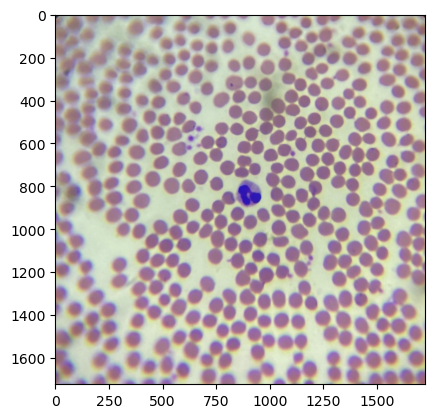

In [17]:
img1 = imread('IMG_4159.JPG')
plt.imshow(img1, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Whitebalanced Image')

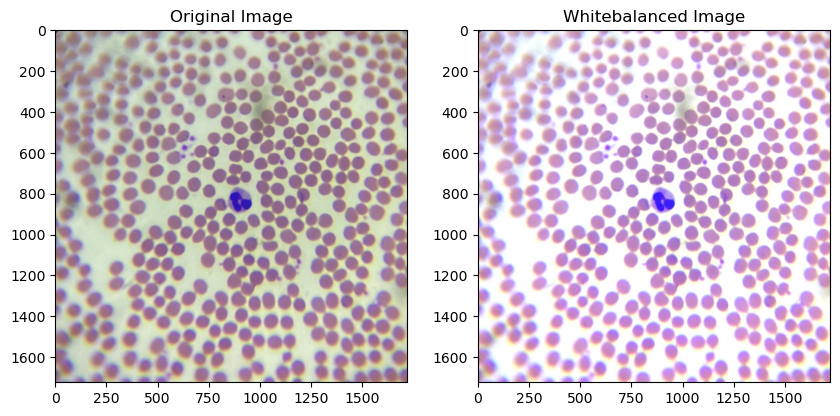

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(img1)
ax[0].set_title('Original Image')
img1_max = (img1*1.2 / img1.max(axis=(0,1)))
ax[1].imshow(img1_max);
ax[1].set_title('Whitebalanced Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Whitebalanced Image')

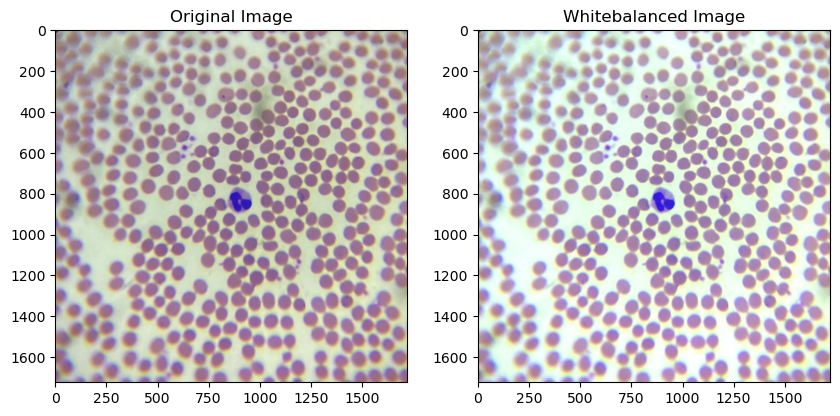

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(img1)
ax[0].set_title('Original Image')
img1_max = (img1*0.8 / img1.mean(axis=(0,1)))
ax[1].imshow(img1_max);
ax[1].set_title('Whitebalanced Image')

##### Function that outputs the histogram of image intensities and each channel’s percentile values

In [27]:
def percentile_whitebalance(image, percentile_value):
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    for channel, color in enumerate('rgb'):
        channel_values = image[:,:,channel]
        value = np.percentile(channel_values, percentile_value)
        ax[0].step(np.arange(256), 
                   np.bincount(channel_values.flatten(), minlength=256)*1.0 / channel_values.size, 
                   c=color)
        ax[0].set_xlim(0, 255)
        ax[0].axvline(value, ls='--', c=color)
        ax[0].text(value-70, .01+.012*channel, 
                   "{}_max_value = {}".format(color, value), 
                   weight='bold', fontsize=10)
        ax[0].set_xlabel('channel value')
        ax[0].set_ylabel('fraction of pixels')
        ax[0].set_title('Histogram of colors in RGB channels') 
        whitebalanced = img_as_ubyte(
            (image*1.0 / np.percentile(image, percentile_value, axis=(0, 1))).clip(0, 1))
        ax[1].imshow(whitebalanced)
        ax[1].set_title('Whitebalanced Image')
    return ax


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

def percentile_whitebalance(image, percentile_value):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    # Calculate white balance
    whitebalanced = img_as_ubyte((image * 1.0 / np.percentile(image, percentile_value, axis=(0, 1))).clip(0, 1))
    
    # Display the white-balanced image
    ax.imshow(whitebalanced)
    ax.set_title('Whitebalanced Image')
    ax.axis('off')  # Turn off axis
    
    return ax

# Example usage
# Call the function with your image and percentile value
# percentile_whitebalance(your_image, your_percentile_value)

## Color correction all images

Run this after 5_artifact removal

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

def percentile_whitebalance(image, percentile_value):
    whitebalanced = img_as_ubyte((image * 1.0 / np.percentile(image, percentile_value, axis=(0, 1))).clip(0, 1))
    return whitebalanced

# Input and output directories
input_dir = '5_remove_artifact_output_images/'
output_dir = '6_col_output_images/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each image in the input directory
for image_name in os.listdir(input_dir):
    if image_name.endswith('.jpg') or image_name.endswith('.JPG'):
        image_path = os.path.join(input_dir, image_name)
        img = cv2.imread(image_path)

        # Calculate white balance with percentile value of 100
        whitebalanced_img = percentile_whitebalance(img, 100)

        # Save the white-balanced image in the output directory
        output_path = os.path.join(output_dir, f'{image_name}')
        cv2.imwrite(output_path, cv2.cvtColor(whitebalanced_img, cv2.COLOR_RGB2BGR))

print('White balance processing completed.')


White balance processing completed.


## 6.0 image artifact removal 

you can use a different number for the kernel size in the cv2.medianBlur() function based on your specific needs and the characteristics of the artifacts you are trying to remove from the image.

By adjusting the kernel size, you can control the extent of smoothing or noise reduction applied to the image. Larger kernel sizes will result in more aggressive smoothing, which can help remove larger artifacts but may also blur image details. On the other hand, smaller kernel sizes will provide less smoothing but may not effectively eliminate larger artifacts or noise.

The range of values you can typically use for the kernel size parameter in the cv2.medianBlur() function in OpenCV is limited to odd integers greater than 1.

The reason for using an odd kernel size is to have a well-defined center pixel when calculating the median value within the neighborhood. Using an odd-size kernel ensures that there is a distinct center pixel, which simplifies the calculation of the median value.

In [29]:
import cv2

# Load the image
image = cv2.imread('cell2_300.png')

# Apply median filtering for noise reduction
filtered_image = cv2.medianBlur(image, 11)

# Display the original and filtered images
#cv2.imshow('Original Image', image)
#cv2.imshow('Filtered Image', filtered_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Save the filtered image
cv2.imwrite('output_image3.jpg', filtered_image)


True

# 6.0 Remove artifact in all images

In [5]:
import os
import cv2

# Input directory containing images with artifacts
input_dir = '4_resize_output_images/'
# Output directory to save processed images
output_dir = '5_remove_artifact_output_images/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over each image in the input directory
for image_name in os.listdir(input_dir):
    if image_name.endswith(('.jpg', '.png', '.jpeg', 'JPG')):
        # Load the image
        image_path = os.path.join(input_dir, image_name)
        image = cv2.imread(image_path)

        # Apply median filtering for artifact removal
        filtered_image = cv2.medianBlur(image, 5)

        # Save the filtered image to the output directory
        output_path = os.path.join(output_dir, image_name)
        cv2.imwrite(output_path, filtered_image)

print("Image artifact removal completed. Processed images saved in the output directory.")


Image artifact removal completed. Processed images saved in the output directory.
